In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc

In [2]:
"""
class MyRandom():
    
    def __init__(self, seed = 15, method='simple'):
        
        self.r = seed
        self.method = method
        
        if method=='simple':
            self.a = 57
            self.c = 1
            self.M = 265
        elif method == 'drand48':
            self.a = int('5DEECE66D',16)
            self.c = int('B',16)
            self.M = 2**48
        else:
            print('Generador no reconocido')
            
    def Random(self):
        
        r = (self.a*self.r + self.c)%self.M
        self.r = r
        
        return r/float(self.M)
    
    def TestMethod(self, Npoints, moment, seed_ = 32, method_ = 'simple'):
        
        rand = MyRandom(seed = seed_, method = method_)
        
        array = np.zeros(Npoints)
            
        for i in range(Npoints):
            array[i] = rand.Random()
            
        return np.sqrt(Npoints)* np.abs(  np.mean(array**moment) - 1./(1.+moment) )
"""

"\nclass MyRandom():\n    \n    def __init__(self, seed = 15, method='simple'):\n        \n        self.r = seed\n        self.method = method\n        \n        if method=='simple':\n            self.a = 57\n            self.c = 1\n            self.M = 265\n        elif method == 'drand48':\n            self.a = int('5DEECE66D',16)\n            self.c = int('B',16)\n            self.M = 2**48\n        else:\n            print('Generador no reconocido')\n            \n    def Random(self):\n        \n        r = (self.a*self.r + self.c)%self.M\n        self.r = r\n        \n        return r/float(self.M)\n    \n    def TestMethod(self, Npoints, moment, seed_ = 32, method_ = 'simple'):\n        \n        rand = MyRandom(seed = seed_, method = method_)\n        \n        array = np.zeros(Npoints)\n            \n        for i in range(Npoints):\n            array[i] = rand.Random()\n            \n        return np.sqrt(Npoints)* np.abs(  np.mean(array**moment) - 1./(1.+moment) )\n"

In [3]:
#U = np.random.uniform( 0,10, 10000 )
#Pois = np.random.poisson(size=10000)
#Normal = np.random.standard_normal(size = 10000)
#print(len(U),len(Pois),len(Normal),len(x))

In [5]:
Points = np.logspace(2,6,5)
print(Points)

[1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]


In [24]:
NMoments = 10
Moments = np.random.uniform(0,NMoments,(NMoments,5))
rand_a = np.random.uniform(0,NMoments,(10,6))
rand = rand_a.tolist()
Moments = []
for k in range(NMoments):
    test = []
    for i in range(1,len(rand[k])):
        test.append((np.sqrt(NMoments)/rand[k][i] -1)-1)  
    Moments.append(test)
    test=[]
Moments=np.array(Moments)

In [25]:
labelk = []
for i in range(NMoments):
    labelk.append(i+1)
print(len(Points),len(Moments))

5 10


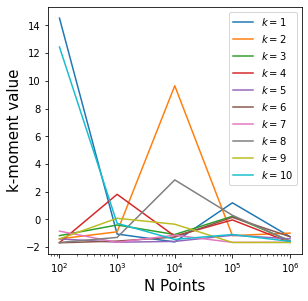

In [26]:
fig = plt.figure( figsize=(10,10) )
ax1 = fig.add_subplot(2,2,1)
for i in range(NMoments):
    ax1.plot(Points,Moments[i], label=r'$k=%.0f$' %(labelk[i]))
    
ax1.set_xscale('log')
ax1.set_xlabel('N Points', fontsize=15)
ax1.set_ylabel('k-moment value', fontsize=15)
ax1.legend()